вариант 2

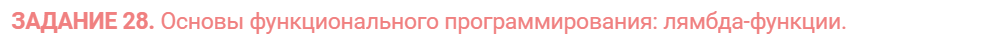

а) Напишите лямбда-функцию, которая принимает один аргумент, и этот аргумент должен быть умножен на неизвестное заданное число.

б) Найти числа, делящиеся на девятнадцать или тринадцать, из списка чисел, используя лямбда-функцию.

в) Напишите программу для подсчёта вещественных чисел в заданном смешанном списке с помощью лямбда-функции.

In [1]:
# a)

n = 10
func = lambda x: x * n
print(func(5))

50


In [2]:
# б) 

lst = [57, 19, 26, 39, 91, 104, 247, 171]

divisible = list(filter(lambda x: x % 19 == 0 or x % 13 == 0, lst))
print(divisible)

[57, 19, 26, 39, 91, 104, 247, 171]


In [3]:
divisible_19_13 = lambda lst: [i for i in lst if i % 19 == 0 or i % 13 == 0]

lst = [57, 19, 26, 39, 91, 104, 247, 171]
print(divisible_19_13(lst))

[57, 19, 26, 39, 91, 104, 247, 171]


In [12]:
# в

is_real = lambda lst: len([i for i in lst if isinstance(i, float) or isinstance(i, int)])

lst = [1, 2.5, 3, 4.7, 5, 'fffff', 12, 'add', [1,2,3]]
print(is_real(lst))

6


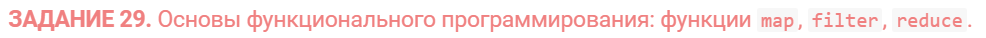
а) Создайте списки, содержащие определенные элементы из кортежа, и преобразуйте строковые значения в целое число. 

Пример: [('Alberto Franco', '15/05/2002', '35kg'), ('Gino Mcneill', '17/05/2002', '37kg'), ('Ryan Parkes', '16/02/1999', '39kg'), ('Eesha Hinton', '25/09/1998', '35kg')] → ['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes', 'Eesha Hinton']; ['15/05/2002', '17/05/2002', '16/02/1999', '25/09/1998']; [35, 37, 39, 35].


б) Сгенерировать список целых чисел. С помощью функции filter() выбрать из списка все положительные числа и упорядочить их по возрастанию. Используя функцию reduce(), найти их сумму.

In [13]:
# a)

test_tuple = [('Alberto Franco', '15/05/2002', '35kg'),
              ('Gino Mcneill', '17/05/2002', '37kg'),
              ('Ryan Parkes', '16/02/1999', '39kg'),
              ('Eesha Hinton', '25/09/1998', '35kg')]


names = list(map(lambda x: x[0], test_tuple))
dates = list(map(lambda x: x[1], test_tuple))
weights = list(map(lambda x: int(x[2][:-2]), test_tuple))

print(names, dates, weights, sep='\n')

['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes', 'Eesha Hinton']
['15/05/2002', '17/05/2002', '16/02/1999', '25/09/1998']
[35, 37, 39, 35]


In [33]:
# б) 

from random import randint
from functools import reduce


lst = [randint(-100, 100) for i in range(10)]
print(lst)

lst_pos = sorted(list(filter(lambda x: x > 0, lst)))
print(lst_pos)

sum_of_pos = reduce(lambda x, y: x + y, lst_pos)
print(sum_of_pos)

[-23, 98, -99, -58, 12, 60, -71, -24, 78, 3]
[3, 12, 60, 78, 98]
251


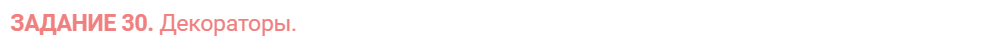
а) Создайте декоратор, который будет выводить на экран результат выполнения функции.


Декораторы могут изменять поведение
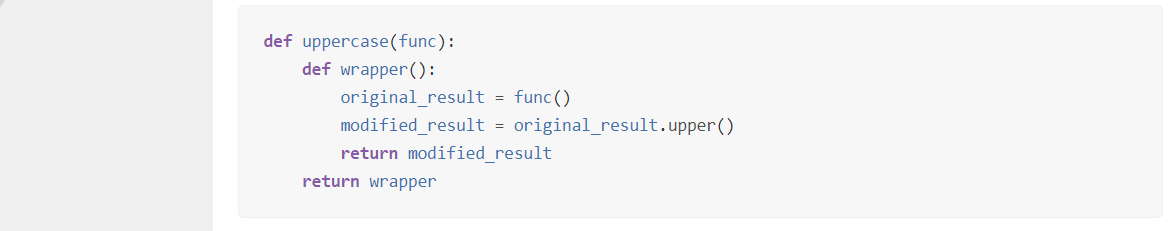

Как декорировать функцию, принимающую произвольные аргументы?

Здесь на помощь приходит функция Python *args и **kwargs для работы с переменным количеством аргументов. Декоратор proxy использует эту возможность:
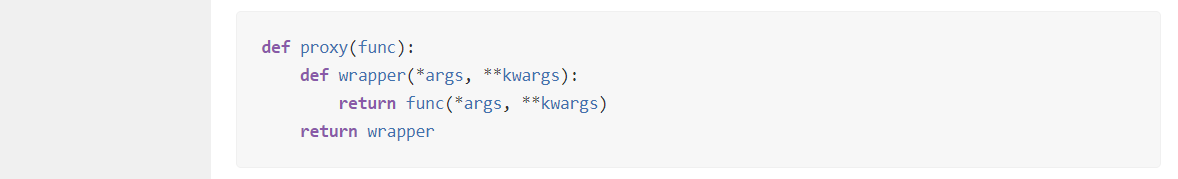

В этом декораторе есть два примечательных момента:

- Он использует операторы * и ** в определении замыкания wrapper для сбора всех позиционных и ключевых аргументов и хранения их в переменных (args и kwargs).
- Затем замыкание wrapper передает собранные аргументы исходной входной функции с помощью операторов «распаковки аргументов» * и **.

In [39]:
# a)

def print_res(func):
    def wrapper(*args, **kwargs):
        # print(f"Вызываем функцию {func.__name__} с аргументами {args} и ключевыми аргументами {kwargs}")
        res = func(*args, **kwargs)
        print(f"Результат выполнения функции: {res}")
        return res
    return wrapper


@print_res
def my_func(n):
    return n * 100


my_func(11)

Результат выполнения функции: 1100


1100


б) Создайте декоратор, который будет принимать аргументы и передавать их в функцию в качестве позиционных параметров и ключевых параметров с заданными значениями по умолчанию.

In [42]:
# б) 

def with_arguments(positional_args, keyword_args):
    def decorator(func):
        def wrapper(*args, **kwargs):
            # Передаем аргументы
            res = func(*args, *positional_args, **keyword_args, **kwargs)
            return res
        return wrapper
    return decorator


# Пример использования
@with_arguments(["Alena", 20], {"greeting": "Hello"})
def my_func_2(name, age, greeting=""):
    print(f"{greeting}\n {name}! You are {age} years old")


my_func_2()

Hello
 Alena! You are 20 years old
